# Speech Emotion Recognition using the RAVDESS AND TESS dataset

For this task, I have used 5252 samples from

the Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS) dataset
the Toronto emotional speech set (TESS) dataset
The samples include:

**1440 **speech files from **RAVDESS**. This dataset includes recordings of 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech includes calm, happy, sad, angry, fearful, surprise, and disgust expressions, and song contains calm, happy, sad, angry, and fearful emotions. Each file was rated 10 times on emotional validity, intensity, and genuineness. Ratings were provided by 247 individuals who were characteristic of untrained adult research participants from North America. A further set of 72 participants provided test-retest data. High levels of emotional validity, interrater reliability, and test-retest intrarater reliability were reported. Validation data is open-access, and can be downloaded along with our paper from PLoS ONE

Mounting Drive so that we can access the contents directly from the drive

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

!conda info --env

# conda environments:
#
base                     C:\Users\godak\miniconda3
capstone              *  C:\Users\godak\miniconda3\envs\capstone
pdf_chatbot_env          C:\Users\godak\miniconda3\envs\pdf_chatbot_env
streamlit                C:\Users\godak\miniconda3\envs\streamlit



Importing Librosa library(A python package) for extracting important features of the audio like the pitch,tone.

In [2]:
!pip install librosa
!pip install resampy

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [4]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -------------- ------------------------- 2.9/7.8 MB 15.2 MB/s eta 0:00:01
   -------------------------------- ------- 6.3/7.8 MB 14.9 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 14.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 15.6 MB/s eta 0:00:00


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


Loading one audio file from the drive using librosa.
Librosa loads the audio file as a floating point time series.

In [6]:
import librosa
from librosa import display

data, sampling_rate = librosa.load('Ravtess/03-01-01-01-01-01-01.wav')

Plotting the audio file which was just loaded by librosa using waveplot function of librosa.This Function Plots the amplitude envelope of a waveform.

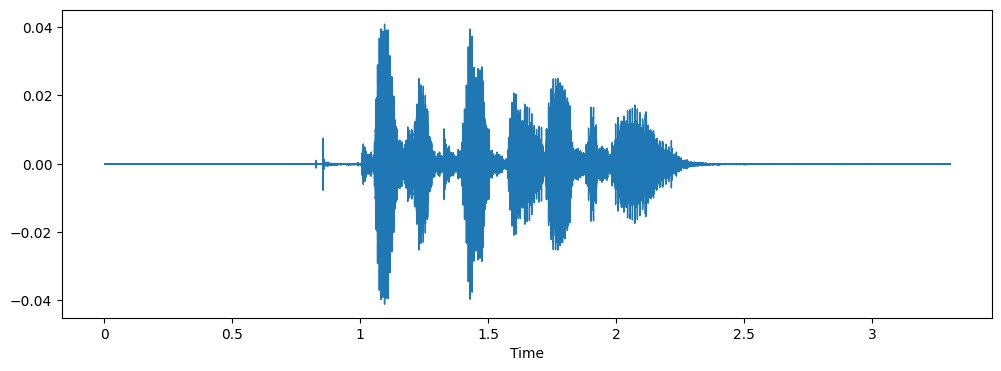

In [7]:
# %pylab inline
import matplotlib.pyplot as plt
# import librosa.display

plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=sampling_rate)

# Load all files

We will create our numpy array extracting Mel-frequency cepstral coefficients (MFCCs), while the classes to predict will be extracted from the name of the file (see the introductory section of this notebook to see the naming convention of the files of this dataset).

In [9]:
import time
import os
import numpy as np
path = 'Ravtess/'
lst = []

start_time = time.time()

for subdir, dirs, files in os.walk(path):
  for file in files:
      try:
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
        # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
        # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
        file = int(file[7:8]) - 1
        arr = mfccs, file
        lst.append(arr)
      # If the file is not valid, skip it
      except ValueError:
        continue

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

--- Data loaded. Loading time: 50.71322584152222 seconds ---


In [10]:
# Creating X and y: zip makes a list of all the first elements, and a list of all the second elements.
X, y = zip(*lst)

In [11]:
import numpy as np
X = np.asarray(X)
y = np.asarray(y)


X.shape, y.shape

((1440, 40), (1440,))

In [14]:
# Saving joblib files to not load them again with the loop above

import joblib

X_name = 'X.joblib'
y_name = 'y.joblib'
save_dir = 'Ravtess_model'

savedX = joblib.dump(X, os.path.join(save_dir, X_name))
savedy = joblib.dump(y, os.path.join(save_dir, y_name))

In [16]:
# Loading saved models
import joblib
X = joblib.load('Ravtess_model/X.joblib')
y = joblib.load('Ravtess_model/y.joblib')

# Decision Tree Classifier

To make a first attempt in accomplishing this classification task I chose a decision tree:

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
dtree = DecisionTreeClassifier()

In [20]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
predictions = dtree.predict(X_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.30      0.52      0.38        25
           1       0.51      0.42      0.46        62
           2       0.28      0.24      0.26        70
           3       0.29      0.26      0.27        70
           4       0.55      0.57      0.56        58
           5       0.42      0.36      0.39        67
           6       0.31      0.32      0.32        65
           7       0.33      0.41      0.36        59

    accuracy                           0.37       476
   macro avg       0.37      0.39      0.37       476
weighted avg       0.37      0.37      0.37       476



# Neural network

In [23]:
import numpy as np
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [24]:
x_traincnn.shape, x_testcnn.shape

((964, 40, 1), (476, 40, 1))

In [28]:
!pip install keras tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl.metadata (4.9 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.68.0-cp311-cp311-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached ml_dtypes-0.4.1-cp311-cp311-win_amd64.whl.metadata (20 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp311

DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [29]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv1D(64, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(256, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(learning_rate=0.00005, rho=0.9, epsilon=1e-07, decay=0.0)

C:\Users\godak\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\godak\AppData\Roaming\Python\Python311\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 40, 64)              │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 40, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 40, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 10, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 10, 128)             │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 10, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 2, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 2, 256)              │         164,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 2, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │           4,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 8)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 209,672 (819.03 KB)

 Trainable params: 209,672 (819.03 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [32]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=200, validation_data=(x_testcnn, y_test))

Epoch 1/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1431 - loss: 5.9763 - val_accuracy: 0.1597 - val_loss: 3.0601
Epoch 2/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1427 - loss: 4.4954 - val_accuracy: 0.1218 - val_loss: 2.8461
Epoch 3/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1485 - loss: 4.1352 - val_accuracy: 0.1807 - val_loss: 2.3696
Epoch 4/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1333 - loss: 3.7622 - val_accuracy: 0.1450 - val_loss: 2.2832
Epoch 5/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1370 - loss: 3.4472 - val_accuracy: 0.1954 - val_loss: 2.2201
Epoch 6/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1838 - loss: 3.0881 - val_accuracy: 0.1660 - val_loss: 2.1800
Epoch 7/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1743 - loss: 2.8758 - val_accuracy: 0.1807 - val_loss: 2.1059
Epoch 8/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1781 - loss: 2.7233 - val_accuracy: 0.2290 - v

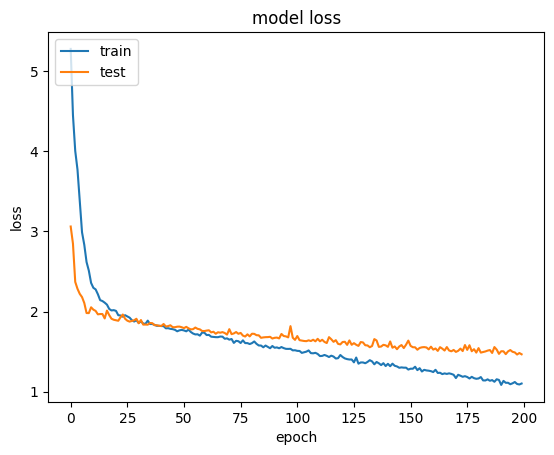

In [33]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

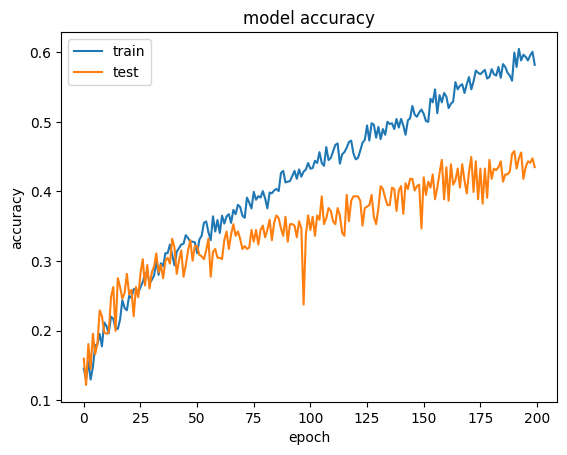

In [34]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
predictions = model.predict(x_testcnn)
predictions = np.argmax(predictions,axis=1)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [36]:
predictions

array([3, 7, 6, 1, 3, 5, 7, 6, 4, 1, 6, 1, 4, 7, 1, 2, 4, 4, 1, 2, 7, 5,
       6, 2, 5, 5, 7, 2, 7, 1, 5, 6, 4, 1, 3, 4, 7, 1, 6, 1, 7, 7, 4, 1,
       4, 7, 7, 6, 2, 2, 6, 3, 1, 6, 1, 5, 4, 7, 4, 2, 3, 4, 2, 6, 7, 5,
       7, 1, 6, 1, 4, 1, 4, 3, 3, 1, 3, 4, 1, 2, 3, 1, 2, 5, 7, 4, 1, 4,
       6, 2, 1, 5, 5, 6, 4, 2, 2, 4, 5, 3, 6, 3, 6, 1, 4, 3, 7, 6, 4, 7,
       5, 4, 4, 2, 6, 4, 4, 2, 5, 5, 1, 6, 4, 7, 5, 1, 6, 7, 1, 2, 4, 2,
       3, 7, 1, 1, 2, 1, 7, 7, 5, 1, 7, 1, 1, 7, 4, 6, 6, 3, 1, 7, 6, 4,
       4, 1, 5, 1, 1, 1, 5, 1, 6, 3, 2, 6, 4, 1, 1, 4, 3, 4, 2, 4, 4, 4,
       3, 1, 0, 4, 2, 2, 3, 1, 4, 6, 6, 2, 1, 6, 4, 6, 7, 4, 1, 3, 7, 6,
       1, 7, 5, 4, 5, 7, 6, 7, 4, 7, 7, 4, 3, 3, 4, 7, 5, 5, 1, 7, 1, 1,
       5, 6, 3, 4, 3, 1, 4, 6, 7, 5, 2, 1, 4, 2, 4, 1, 7, 1, 7, 5, 6, 4,
       1, 6, 1, 1, 6, 5, 4, 3, 5, 6, 6, 1, 1, 6, 6, 4, 5, 2, 2, 1, 3, 4,
       4, 6, 7, 1, 1, 2, 4, 7, 5, 6, 3, 3, 5, 1, 5, 3, 7, 4, 7, 4, 1, 4,
       7, 7, 4, 2, 1, 1, 4, 7, 1, 5, 3, 7, 3, 2, 7,

In [37]:
y_test

array([1, 3, 3, 0, 3, 5, 7, 7, 6, 1, 3, 1, 6, 5, 1, 7, 4, 4, 2, 2, 6, 5,
       6, 3, 4, 4, 3, 2, 0, 1, 5, 6, 5, 3, 3, 4, 0, 1, 6, 0, 2, 6, 2, 1,
       4, 7, 0, 1, 7, 2, 6, 3, 7, 6, 3, 5, 2, 6, 5, 1, 3, 7, 7, 1, 7, 1,
       7, 0, 5, 6, 4, 2, 4, 0, 2, 2, 6, 2, 3, 3, 2, 0, 3, 6, 7, 6, 1, 0,
       0, 2, 2, 5, 5, 3, 2, 2, 2, 6, 5, 1, 4, 6, 4, 1, 4, 3, 7, 2, 7, 4,
       2, 4, 2, 2, 5, 4, 6, 3, 5, 5, 1, 2, 4, 0, 5, 3, 6, 3, 1, 4, 4, 5,
       3, 4, 1, 3, 7, 1, 7, 7, 3, 4, 4, 1, 0, 3, 2, 4, 5, 5, 1, 5, 6, 3,
       4, 3, 5, 1, 3, 1, 5, 1, 4, 3, 5, 0, 3, 1, 1, 4, 3, 5, 5, 4, 5, 7,
       0, 0, 7, 4, 5, 2, 5, 3, 4, 4, 6, 2, 3, 6, 4, 1, 3, 5, 2, 3, 7, 7,
       7, 7, 3, 6, 5, 7, 6, 7, 4, 7, 4, 4, 3, 5, 7, 7, 5, 2, 1, 6, 1, 0,
       5, 5, 2, 4, 0, 1, 2, 5, 7, 6, 6, 2, 5, 2, 5, 3, 7, 3, 7, 4, 3, 4,
       1, 6, 6, 1, 7, 1, 6, 0, 7, 2, 6, 3, 6, 1, 6, 4, 5, 2, 5, 3, 6, 5,
       6, 2, 7, 5, 7, 2, 2, 2, 5, 6, 3, 3, 5, 1, 5, 3, 7, 4, 0, 7, 1, 7,
       3, 7, 6, 4, 1, 1, 4, 7, 1, 2, 2, 7, 5, 5, 3,

In [38]:
new_Ytest = y_test.astype(int)

In [39]:
new_Ytest

array([1, 3, 3, 0, 3, 5, 7, 7, 6, 1, 3, 1, 6, 5, 1, 7, 4, 4, 2, 2, 6, 5,
       6, 3, 4, 4, 3, 2, 0, 1, 5, 6, 5, 3, 3, 4, 0, 1, 6, 0, 2, 6, 2, 1,
       4, 7, 0, 1, 7, 2, 6, 3, 7, 6, 3, 5, 2, 6, 5, 1, 3, 7, 7, 1, 7, 1,
       7, 0, 5, 6, 4, 2, 4, 0, 2, 2, 6, 2, 3, 3, 2, 0, 3, 6, 7, 6, 1, 0,
       0, 2, 2, 5, 5, 3, 2, 2, 2, 6, 5, 1, 4, 6, 4, 1, 4, 3, 7, 2, 7, 4,
       2, 4, 2, 2, 5, 4, 6, 3, 5, 5, 1, 2, 4, 0, 5, 3, 6, 3, 1, 4, 4, 5,
       3, 4, 1, 3, 7, 1, 7, 7, 3, 4, 4, 1, 0, 3, 2, 4, 5, 5, 1, 5, 6, 3,
       4, 3, 5, 1, 3, 1, 5, 1, 4, 3, 5, 0, 3, 1, 1, 4, 3, 5, 5, 4, 5, 7,
       0, 0, 7, 4, 5, 2, 5, 3, 4, 4, 6, 2, 3, 6, 4, 1, 3, 5, 2, 3, 7, 7,
       7, 7, 3, 6, 5, 7, 6, 7, 4, 7, 4, 4, 3, 5, 7, 7, 5, 2, 1, 6, 1, 0,
       5, 5, 2, 4, 0, 1, 2, 5, 7, 6, 6, 2, 5, 2, 5, 3, 7, 3, 7, 4, 3, 4,
       1, 6, 6, 1, 7, 1, 6, 0, 7, 2, 6, 3, 6, 1, 6, 4, 5, 2, 5, 3, 6, 5,
       6, 2, 7, 5, 7, 2, 2, 2, 5, 6, 3, 3, 5, 1, 5, 3, 7, 4, 0, 7, 1, 7,
       3, 7, 6, 4, 1, 1, 4, 7, 1, 2, 2, 7, 5, 5, 3,

In [40]:
from sklearn.metrics import classification_report
report = classification_report(new_Ytest, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.47      0.77      0.59        62
           2       0.39      0.31      0.35        70
           3       0.38      0.26      0.31        70
           4       0.42      0.66      0.51        58
           5       0.54      0.45      0.49        67
           6       0.36      0.32      0.34        65
           7       0.48      0.51      0.50        59

    accuracy                           0.43       476
   macro avg       0.38      0.41      0.38       476
weighted avg       0.41      0.43      0.41       476



In [41]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(new_Ytest, predictions)
print (matrix)

# 0 = neutral, 1 = calm, 2 = happy, 3 = sad, 4 = angry, 5 = fearful, 6 = disgust, 7 = surprised

[[ 0 11  0  6  1  0  2  5]
 [ 0 48  2  3  0  4  5  0]
 [ 0  9 22  9 15  6  6  3]
 [ 0 18  9 18  2  8  6  9]
 [ 0  1  2  2 38  3  8  4]
 [ 0  4 12  5  9 30  5  2]
 [ 0  8  3  4 16  4 21  9]
 [ 2  3  6  1 10  1  6 30]]


In [42]:
model.save('testing10_model.h5')
print("MODEL SAVED")

MODEL SAVED


In [51]:
new_model=keras.models.load_model('testing10_model.h5')
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 40, 64)              │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 40, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 40, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 10, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 10, 128)             │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 10, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 2, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 2, 256)              │         164,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 2, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │           4,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 8)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 209,674 (819.04 KB)

 Trainable params: 209,672 (819.03 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [52]:
loss, acc = new_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4320 - loss: 1.4706
Restored model, accuracy: 86.97%
